```
Generative AI with Python, by Fernando Amaral
```

# Setup

In [ ]:
#gpu
!pip install diffusers transformers accelerate safetensors

In [ ]:
import torch
import matplotlib.pyplot as plt
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler

# Diagram

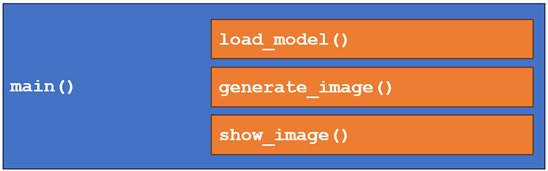

# Code

In [ ]:
def load_model(pretrained_model_or_path):
    scheduler = EulerDiscreteScheduler.from_pretrained(pretrained_model_or_path, subfolder="scheduler")
    pipeline = StableDiffusionPipeline.from_pretrained(pretrained_model_or_path,
                                                       scheduler=scheduler, torch_dtype=torch.float16).to("cuda")
    return pipeline

In [ ]:
def generate_image(pipeline, prompt, negative_prompt, num_images_per_prompt, num_inference_steps, height, width, guidance_scale):
    generator = torch.Generator(device="cuda").manual_seed(123)
    image_results = pipeline(prompt=prompt, num_images_per_prompt=num_images_per_prompt,
                             negative_prompt=negative_prompt,
                             num_inference_steps=num_inference_steps,
                             height=height, width=width,
                             guidance_scale=guidance_scale,
                             generator=generator)
    return image_results["images"]

In [ ]:
def show_image(images):
    num_images = len(images)
    plt.figure(figsize=(15,5))
    for i, img in enumerate(images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Imagem {i+1}')
    plt.show()

In [ ]:
def main():
    prompt = "Create a serene landscape with a mountain in the background, a flowing river in the foreground, and a clear blue sky."
    negative_prompt = "Do not include any human or animal figures in the landscape."
    pretrained_model_or_path = "stabilityai/stable-diffusion-2-1-base"
    num_images_per_prompt = 3
    num_inference_steps = 100
    height = 512
    width = 512
    guidance_scale = 6

    pipeline = load_model(pretrained_model_or_path)
    images = generate_image(pipeline, prompt, negative_prompt, num_images_per_prompt, num_inference_steps, height, width, guidance_scale)
    show_image(images)

# Execution

In [ ]:
main()